In [1]:
#https://www.kaggle.com/tokutani/lee-carter-model
#http://www.actuaries.jp/lib/y_ronbun/H18-2.pdf

# arima : http://zhuanlan.zhihu.com/p/60648709
# svd : https://www.cnblogs.com/pinard/p/6251584.html

In [2]:
import pandas as pd
import numpy as np

In [3]:
CSV_FIlE = "../japan3.csv"
IMG_DIR = "./mf"

df = pd.read_csv(CSV_FIlE)
df, df_test = df[(df["year"]<2010) & (df["year"]>=1965)], df[df["year"]>=2010]
year = df["year"].to_numpy().reshape(-1,1)
age = df["age"].to_numpy().reshape(-1,1)
T = int(max(age) - min(age))
span = int(max(year) - min(year))
rate = df["rate"].to_numpy().reshape(-1,T+1)
rate

array([[0.00727471, 0.0080357 , 0.00886035, ..., 0.43243243, 0.45238095,
        0.45833333],
       [0.0072565 , 0.00747988, 0.00838251, ..., 0.40601504, 0.41772152,
        0.43478261],
       [0.00697557, 0.00748843, 0.0081033 , ..., 0.4028777 , 0.42168675,
        0.42857143],
       ...,
       [0.00329878, 0.00360296, 0.00388929, ..., 0.30328164, 0.32349896,
        0.34353481],
       [0.0033268 , 0.00351578, 0.00395875, ..., 0.31137048, 0.33187534,
        0.35298935],
       [0.00333587, 0.00351435, 0.00399912, ..., 0.30489039, 0.32557011,
        0.34604317]])

In [4]:
logm_xt = np.log(rate).T
a_x = logm_xt.mean(axis=1).reshape(-1,1)

z_xt = logm_xt - a_x

U,S,V = np.linalg.svd(z_xt, full_matrices=True)

b_x_k_t = U[0].reshape(-1,1)*S[0]*V[:,0].reshape(1,-1)
e_xt = z_xt - b_x_k_t


# bx,kt
k_t = V[:,0]
b_x = S[0]*U[0] 

X = 1/b_x.sum()
Y = -np.mean(k_t/X)


a_x = a_x - X*Y*b_x # new solution
b_x = b_x*X # sum b_x = 1
k_t = k_t/X + Y  # sum k_t = 0

logm_xt_lcfitted = b_x_k_t + a_x[:,0].reshape(-1,1)


b_x.shape,k_t.shape,logm_xt.shape,a_x.shape

((51,), (45,), (51, 45), (51, 51))

In [5]:
k_t.sum(),b_x.sum()

(-2.6645352591003757e-15, 1.0000000000000002)

In [6]:
b_x

array([ 1.14142714e-01,  1.24029251e-01,  2.08995091e-01,  2.00172747e-01,
       -1.52197800e-01,  2.11460912e-02,  2.30908952e-01, -1.75690794e-01,
        8.97292707e-02,  2.24573984e-02, -2.38300473e-01, -2.18917848e-01,
       -2.91782994e-01,  2.45881859e-01,  1.37455315e-01, -5.01339239e-02,
        1.33693316e-01,  4.35970288e-02, -6.46571468e-02, -1.14782152e-01,
        5.95813472e-02,  1.43768640e-01,  6.37234252e-02, -1.14701334e-02,
        9.05779952e-04,  6.87427321e-02,  3.31098801e-02,  1.74425900e-01,
       -3.57713724e-02, -3.53417149e-02,  1.17798499e-01,  6.70373871e-02,
       -6.80360986e-02,  5.81167378e-02, -2.44285892e-02,  2.05141005e-03,
        1.00962324e-01,  7.75341976e-02,  1.21566675e-01, -1.02694714e-01,
       -1.21843000e-02, -4.83962790e-05, -1.21066470e-01, -2.58011046e-02,
       -8.90703932e-02,  6.53693548e-03,  7.41666389e-02,  4.91721443e-02,
        1.98526927e-02,  1.56361200e-02,  5.47791762e-03])

In [7]:
S[0]/S.sum()

0.6196604777793431

array([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009])

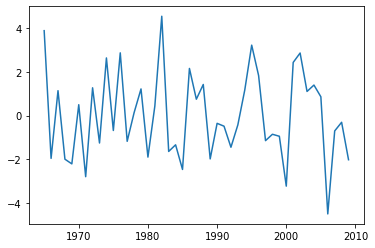

In [8]:
import seaborn as sns
sns.lineplot(year.reshape(-1,T+1)[:,0],k_t)
year.reshape(-1,T+1)[:,0]

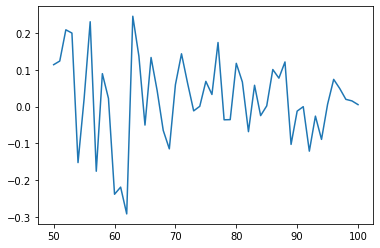

In [9]:
sns.lineplot(age.reshape(span+1,-1)[0], b_x)

In [10]:
np.diff(k_t)

array([-5.85878769,  3.10586412, -3.14369953, -0.21540533,  2.71508579,
       -3.30250467,  4.07851342, -2.53302221,  3.90299641, -3.32837549,
        3.56167292, -4.05906699,  1.31364888,  1.08988999, -3.12750181,
        2.34504062,  4.11786   , -6.20361372,  0.3043698 , -1.13085631,
        4.63479005, -1.4114211 ,  0.67613606, -3.41509332,  1.63154358,
       -0.13041393, -0.96620187,  1.027731  ,  1.59913938,  2.05774546,
       -1.39527425, -2.98575392,  0.29184755, -0.09175183, -2.28823648,
        5.67623911,  0.43197025, -1.76399715,  0.29347659, -0.53753526,
       -5.37465232,  3.80760882,  0.39662206, -1.71810101])

[[ 50  51  52 ...  98  99 100]
 [ 50  51  52 ...  98  99 100]
 [ 50  51  52 ...  98  99 100]
 ...
 [ 50  51  52 ...  98  99 100]
 [ 50  51  52 ...  98  99 100]
 [ 50  51  52 ...  98  99 100]]


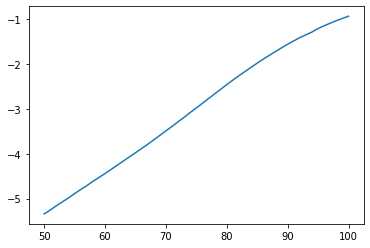

In [11]:
print(age.reshape(span+1,-1))
sns.lineplot(age.reshape(span+1,-1)[0], a_x[:,0])

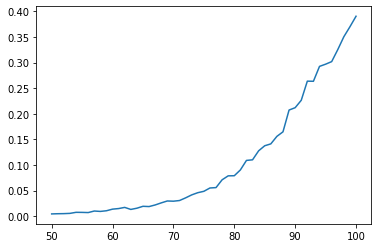

In [12]:
sns.lineplot(age.reshape(span+1,-1)[0],np.exp(logm_xt_lcfitted[:,10]))

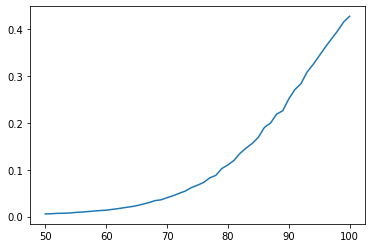

In [13]:
sns.lineplot(age.reshape(span+1,-1)[0],np.exp(logm_xt[:,10]))

In [14]:
b_x.reshape(-1,1)

array([[ 1.14142714e-01],
       [ 1.24029251e-01],
       [ 2.08995091e-01],
       [ 2.00172747e-01],
       [-1.52197800e-01],
       [ 2.11460912e-02],
       [ 2.30908952e-01],
       [-1.75690794e-01],
       [ 8.97292707e-02],
       [ 2.24573984e-02],
       [-2.38300473e-01],
       [-2.18917848e-01],
       [-2.91782994e-01],
       [ 2.45881859e-01],
       [ 1.37455315e-01],
       [-5.01339239e-02],
       [ 1.33693316e-01],
       [ 4.35970288e-02],
       [-6.46571468e-02],
       [-1.14782152e-01],
       [ 5.95813472e-02],
       [ 1.43768640e-01],
       [ 6.37234252e-02],
       [-1.14701334e-02],
       [ 9.05779952e-04],
       [ 6.87427321e-02],
       [ 3.31098801e-02],
       [ 1.74425900e-01],
       [-3.57713724e-02],
       [-3.53417149e-02],
       [ 1.17798499e-01],
       [ 6.70373871e-02],
       [-6.80360986e-02],
       [ 5.81167378e-02],
       [-2.44285892e-02],
       [ 2.05141005e-03],
       [ 1.00962324e-01],
       [ 7.75341976e-02],
       [ 1.2

In [15]:
chk = logm_xt_lcfitted - a_x[:,0].reshape(-1,1)
chk = chk - np.dot(b_x.reshape(-1,1),k_t.reshape(-1,1).T)
chk = chk*chk
print(chk.sum())

0.0206700494060228


In [16]:
! pip3 list | grep statsmodels

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
statsmodels (0.11.1)


In [17]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.tsa.ar_model import AutoReg

(<matplotlib.axes._subplots.AxesSubplot at 0x7fed9b5b5ac8>,
 (-5.334144241509055,
  4.650917661783991e-06,
  7,
  36,
  {'1%': -3.626651907578875,
   '5%': -2.9459512825788754,
   '10%': -2.6116707716049383},
  144.33792864203917))

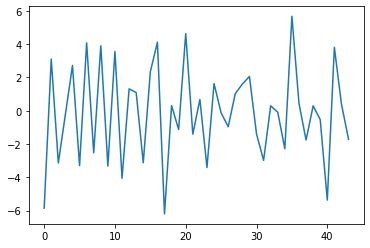

In [18]:
k_t_ADF = ADF(np.diff(k_t))
sns.lineplot(np.arange(len(np.diff(k_t))),np.diff(k_t)),k_t_ADF

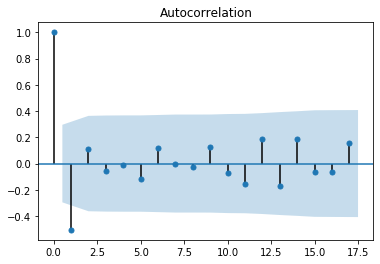

In [19]:
acf = sm.graphics.tsa.plot_acf(np.diff(k_t))

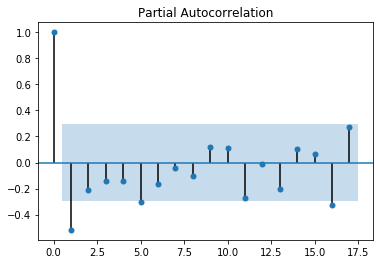

In [20]:
pacf = sm.graphics.tsa.plot_pacf(np.diff(k_t))

In [21]:
trend_evaluate = sm.tsa.arma_order_select_ic(np.diff(k_t), ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)

/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/chen/work/venv/lib/pyt

In [22]:
trend_evaluate

{'aic':             0           1           2           3           4
 0         NaN  194.690177  196.510051  198.472141  196.237873
 1  208.426102  196.499494  198.308678  200.268217  196.707030
 2  208.413970  198.438260  200.281718  199.035313  200.476604
 3  209.257514  199.275260  194.466184  200.404704  203.132570
 4  209.649125  197.928951  194.633218  197.656449  199.984578,
 'bic':             0           1           2           3           4
 0         NaN  198.258556  201.862620  205.608899  205.158821
 1  211.994482  201.852063  205.445437  209.189166  207.412167
 2  213.766539  205.575018  209.202666  209.740451  212.965932
 3  216.394272  208.196208  205.171322  212.894031  217.406088
 4  218.570073  208.634088  207.122546  211.929966  216.042285,
 'aic_min_order': (3, 2),
 'bic_min_order': (0, 1)}

In [23]:
model = ARIMA(k_t, order=(0,1,2))

In [24]:
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   44
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -95.193
Method:                       css-mle   S.D. of innovations              2.013
Date:                Thu, 04 Mar 2021   AIC                            198.387
Time:                        02:01:11   BIC                            205.524
Sample:                             1   HQIC                           201.034
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0077      0.022     -0.349      0.727      -0.051       0.035
ma.L1.D.y     -1.0631      0.170     -6.249      0.000      -1.397      -0.730
ma.L2.D.y      0.0631      0.158      0.399      0.690      -0.247       0.373
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           15.8360           +0.0000j           15.8360            0.0000
-----------------------------------------------------------------------------
"""

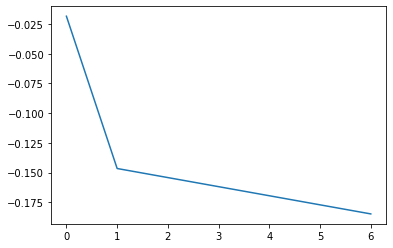

In [25]:
sns.lineplot(np.arange(7),model_fit.forecast(steps = 7)[0])

In [26]:
# age 90 = #41
age = 90
index = age - 50
steps = 7
df_test[df_test["age"]==age]

,Unnamed: 0,age,year,D,L,rate
3253,3254,90,2010,3530,21308,0.165665
3304,3305,90,2011,3438,21164,0.162446
3355,3356,90,2012,3648,22073,0.165270
3406,3407,90,2013,3630,22875,0.158689
3457,3458,90,2014,3716,23977,0.154982
3508,3509,90,2015,3865,24821,0.155715
3559,3560,90,2016,3959,25567,0.154848


In [27]:
age_predict = np.exp(a_x[index][0] + b_x[index]*model_fit.forecast(steps = steps)[0])
age_predict

array([0.21020612, 0.21053497, 0.2105546 , 0.21057424, 0.21059387,
       0.21061351, 0.21063315])

In [28]:
a_x[index][0]

-1.5598900641054205

In [29]:
b_x[index]*model_fit.forecast(steps = steps)[0]

array([0.00022334, 0.00178656, 0.00187981, 0.00197305, 0.0020663 ,
       0.00215955, 0.00225279])

In [30]:
model_fit.forecast(steps = steps)[0]

array([-0.01832982, -0.14662826, -0.1542812 , -0.16193414, -0.16958708,
       -0.17724002, -0.18489296])

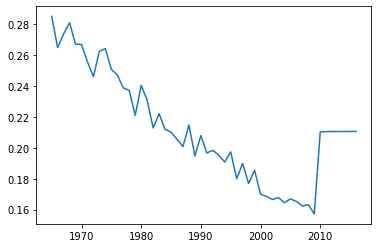

In [31]:
sns.lineplot(np.arange(min(year),min(year)+span+steps+1),np.concatenate([rate[:,index],age_predict]))

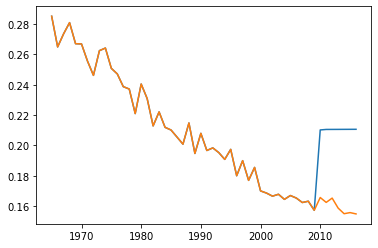

In [32]:
sns.lineplot(np.arange(min(year),min(year)+span+steps+1),np.concatenate([rate[:,index],age_predict]))
sns.lineplot(np.arange(min(year),min(year)+span+7+1),np.concatenate([rate[:,index],df_test[df_test["age"]==age].rate.to_numpy()]))

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse = mean_squared_error(age_predict, df_test[df_test["age"]==age].rate.to_numpy(), squared=False)

rmse

0.0510711300775066

In [34]:
# AR(1)

model = sm.tsa.AutoReg(k_t, 1).fit()

model.params

array([-0.08459708, -0.08527848])

In [35]:
def ar(x, params):
    return params[0] + params[1]*x

In [36]:
ar_pred = []
ph = rate[-1,index]
print(ph)
for i in range(7):
    ph = ar(ph,model.params)
    ar_pred.append(ph)
ar_pred = np.array(ar_pred)
ar_pred

0.157232704402516


array([-0.09800565, -0.07623931, -0.07809551, -0.07793722, -0.07795071,
       -0.07794956, -0.07794966])

In [37]:
age_ar_predict = np.exp(a_x[index][0] + b_x[index]*ar_pred)
age_ar_predict

array([0.21041028, 0.21035449, 0.21035924, 0.21035884, 0.21035887,
       0.21035887, 0.21035887])

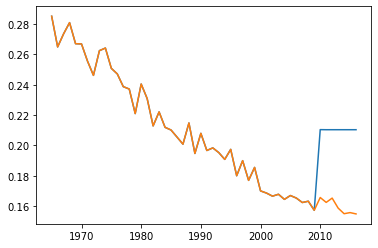

In [38]:
sns.lineplot(np.arange(min(year),min(year)+span+7+1),np.concatenate([rate[:,index],age_ar_predict]))
sns.lineplot(np.arange(min(year),min(year)+span+7+1),np.concatenate([rate[:,index],df_test[df_test["age"]==age].rate.to_numpy()]))